### Import/Install Libraries

In [482]:
# !pip install -r requirements.txt

In [890]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
import pickle
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading words: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


### Load the data

In [891]:
data = pd.read_csv('train.csv')
professioni = pd.read_csv('professioni.csv')

In [892]:
print('Job Vacancies')
data['Role'] = data['Role'].replace('Commessa','commesso di vendita')
data['Role'] = data['Role'].replace('Tecnico elettromeccanico','Manutentore elettromeccanico')

data.head()

Job Vacancies


,Fonte,Job_Description,Role
0,Randstad Technical,Randstad Technical di Vimercate seleziona un m...,Manutentore elettromeccanico
1,Monster,Ricerchiamo N. 5 ricerca ADDETTI/E VENDITA per...,commesso di vendita
2,Monster,"Quanta SpA, Filiale di Verona, seleziona per a...",Manutentore elettromeccanico
3,Monster,"Kelly Services, multinazionale americana leade...",Manutentore elettromeccanico
4,Monster,ADHR Filiale di Torino ricerca per azienda cli...,Data Scientist


In [893]:
print('Professioni')
professioni.head()

Professioni


,Group,Subgroup,Descrizione_professione,Descrizione_professione2,subgroup1,subgroup2,Esco_Abilit_compet_essenz,Esco_conoscenze_essenz,Esco_Abilit_compet_opz,Conoscenze
0,Statistici,Attuario\nData scientist\nEsperto in ricerca o...,Accertamenti tecnici per la valutazione delle ...,Elaborare piani tecnici per la trasformazione ...,consulente attuariale\ndemografo demografa\nsp...,consulente attuariale\ndemografo demografa\nsp...,correggere i dati\ncostruire sistemi di raccom...,classificazione delle informazioni\nelaborazio...,creare modelli di dati\ndefinire criteri di qu...,LDAP\nLINQ\nMDX\nN1QL\nSPARQL\nXQuery\nbusines...
1,Cuochi in alberghi e ristoranti,Aiuto cuoco\nAiuto cuoco di ristorante\nAntipa...,Allestimento dei piatti\nApplicazione delle pr...,Effettuare la preparazione dell'impasto da piz...,capo chef pasticcere capo chef pasticcera\nche...,addetta alla preparazione degli alimenti\ncuoc...,consegnare la zona di preparazione di alimenti...,"legislazione in materia di salute, sicurezza e...",NaN,NaN
2,Commessi alle vendite al minuto,Addetto al banco vendita di macelleria\nAddett...,Allestimento degli scaffali e delle isole prom...,Allestire e rifornire gli scaffali e le isole ...,commesso di negozio di abbigliamento commessa ...,commessa di negozio di abbigliamento uomo donn...,applicare le competenze matematiche\nconsiglia...,argomentazione di vendita\ncaratteristiche dei...,eseguire piccoli interventi di sartoria,industria dell'abbigliamento
3,Elettromeccanici,Aggiustatore elettromeccanico\nAvvolgitore di ...,Cablatura dell'impianto elettrico\nCollaudo de...,Effettuare la diagnosi tecnica (strumentale e ...,manutentore elettromeccanico manutentrice elet...,elettricista a bordo macchina\nelettricista-me...,adattare le attrezzature meccanizzate\napplica...,elettricità\nelettromeccanica\nelettronica\nme...,applicare un rivestimento alle apparecchiature...,accessori per cavi elettrici\ncomponenti di ba...


### Text Preprocessing on Professioni csv

In [894]:
# professoni.Subgroup = professioni.Subgroup.apply(lambda x: re.sub("[^a-zA-Z]", "", x))
# letters = re.sub("[^a-zA-Z]", "", x)
# letters = letters.lower()
professioni.Subgroup = professioni.Subgroup.apply(lambda x: x.lower().split('\n'))
professioni.Subgroup = professioni.Subgroup.apply(lambda x: [i.split("'") for i in x])

professioni.subgroup1 = professioni.subgroup1.apply(lambda x: x.lower().split('\n'))
professioni.subgroup1 = professioni.subgroup1.apply(lambda x: [i.split("'") for i in x])

professioni.subgroup2 = professioni.subgroup2.apply(lambda x: x.lower().split('\n'))
professioni.subgroup2 = professioni.subgroup2.apply(lambda x: [i.split("'") for i in x])

professioni.Subgroup = professioni.Subgroup + professioni.subgroup1 + professioni.subgroup2
professioni.Subgroup  = professioni.Subgroup.apply(lambda x: [ i for t in x for i in t])
professioni.Subgroup = professioni.Subgroup.apply(lambda x: list(set(x)))

# professioni.Subgroup_add_info = professioni.Subgroup.apply(lambda x: [word_tokenize(i) for i in x])
# # professioni.Subgroup_add_info = professioni.Subgroup.apply(lambda x: set([i for t in x for i in t]))
# professioni.Subgroup = professioni.Subgroup + professioni.Subgroup_add_info

In [895]:
professioni.Subgroup.iloc[0]

['statistico',
 '',
 'esperto ricerca operativa',
 'consulente attuariale',
 'statistico statistica',
 'statistici',
 'statistico economico',
 'statistico applicato',
 'specialista in biometria',
 'attuario',
 'statistico esperto in controlli di qualità',
 'demografo demografa',
 'data scientist',
 'esperto in ricerca operativa',
 'statistico metodologico']

In [896]:
# to remove empty space from the subgroup list of values
for i in range(0,professioni.Subgroup.shape[0]):
    while("" in professioni.Subgroup.iloc[i]) : 
        professioni.Subgroup.iloc[i].remove("") 

professioni.Subgroup.iloc[0]

['statistico',
 'esperto ricerca operativa',
 'consulente attuariale',
 'statistico statistica',
 'statistici',
 'statistico economico',
 'statistico applicato',
 'specialista in biometria',
 'attuario',
 'statistico esperto in controlli di qualità',
 'demografo demografa',
 'data scientist',
 'esperto in ricerca operativa',
 'statistico metodologico']

### Create a dictionary for professioni. e.g. 
{Statistici : ['attuario', 'data scientist', 'esperto in ricerca operativa',..... ]}

In [897]:
professioni_dictionary = pd.Series(professioni.Subgroup.values,index=professioni.Group).to_dict()
professioni_dictionary # prefessioni dictionary

{'Statistici': ['statistico',
  'esperto ricerca operativa',
  'consulente attuariale',
  'statistico statistica',
  'statistici',
  'statistico economico',
  'statistico applicato',
  'specialista in biometria',
  'attuario',
  'statistico esperto in controlli di qualità',
  'demografo demografa',
  'data scientist',
  'esperto in ricerca operativa',
  'statistico metodologico'],
 'Cuochi in alberghi e ristoranti': ['cuoco',
  'chef privato',
  'cuoca di partita di pesce',
  'pizzaiola',
  'cuoco di partita di camera fredda',
  'cuoco antipastiere',
  'cuoco addetto alla griglia',
  'addetto alla preparazione della pizza',
  'cuoco di partita di salse',
  'cuoco privato',
  ' salsiere',
  'capo chef pasticcera',
  'cuoco-grigliere',
  'cuoco di albergo',
  'aiuto cuoco di ristorante',
  'cuoco di bordo',
  'cuoco di partita di rosticceria',
  'addetta alla preparazione della pizza',
  'chef privata',
  ' cuoco gelatiere',
  'cuoco-grigliere cuoca-grigliera',
  'cuochi in alberghi e ri

In [898]:
# I need this step to convert back
subgroup_dict = {}
for group, subgroups in professioni_dictionary.items():
    for subgroup in subgroups:
        subgroup_dict[subgroup] = group
subgroup_dict

{'statistico': 'Statistici',
 'esperto ricerca operativa': 'Statistici',
 'consulente attuariale': 'Statistici',
 'statistico statistica': 'Statistici',
 'statistici': 'Statistici',
 'statistico economico': 'Statistici',
 'statistico applicato': 'Statistici',
 'specialista in biometria': 'Statistici',
 'attuario': 'Statistici',
 'statistico esperto in controlli di qualità': 'Statistici',
 'demografo demografa': 'Statistici',
 'data scientist': 'Statistici',
 'esperto in ricerca operativa': 'Statistici',
 'statistico metodologico': 'Statistici',
 'cuoco': 'Cuochi in alberghi e ristoranti',
 'chef privato': 'Cuochi in alberghi e ristoranti',
 'cuoca di partita di pesce': 'Cuochi in alberghi e ristoranti',
 'pizzaiola': 'Cuochi in alberghi e ristoranti',
 'cuoco di partita di camera fredda': 'Cuochi in alberghi e ristoranti',
 'cuoco antipastiere': 'Cuochi in alberghi e ristoranti',
 'cuoco addetto alla griglia': 'Cuochi in alberghi e ristoranti',
 'addetto alla preparazione della pizza':

In [899]:
# example of subgroup roles
professioni

,Group,Subgroup,Descrizione_professione,Descrizione_professione2,subgroup1,subgroup2,Esco_Abilit_compet_essenz,Esco_conoscenze_essenz,Esco_Abilit_compet_opz,Conoscenze
0,Statistici,"[statistico, esperto ricerca operativa, consul...",Accertamenti tecnici per la valutazione delle ...,Elaborare piani tecnici per la trasformazione ...,"[[consulente attuariale], [demografo demografa...","[[consulente attuariale], [demografo demografa...",correggere i dati\ncostruire sistemi di raccom...,classificazione delle informazioni\nelaborazio...,creare modelli di dati\ndefinire criteri di qu...,LDAP\nLINQ\nMDX\nN1QL\nSPARQL\nXQuery\nbusines...
1,Cuochi in alberghi e ristoranti,"[cuoco, chef privato, cuoca di partita di pesc...",Allestimento dei piatti\nApplicazione delle pr...,Effettuare la preparazione dell'impasto da piz...,"[[capo chef pasticcere capo chef pasticcera], ...","[[addetta alla preparazione degli alimenti], [...",consegnare la zona di preparazione di alimenti...,"legislazione in materia di salute, sicurezza e...",NaN,NaN
2,Commessi alle vendite al minuto,[addetto alla vendita di ricambi per auto e mo...,Allestimento degli scaffali e delle isole prom...,Allestire e rifornire gli scaffali e le isole ...,[[commesso di negozio di abbigliamento commess...,[[commessa di negozio di abbigliamento uomo do...,applicare le competenze matematiche\nconsiglia...,argomentazione di vendita\ncaratteristiche dei...,eseguire piccoli interventi di sartoria,industria dell'abbigliamento
3,Elettromeccanici,"[collaudatore di apparecchi elettrici, elettri...",Cablatura dell'impianto elettrico\nCollaudo de...,Effettuare la diagnosi tecnica (strumentale e ...,[[manutentore elettromeccanico manutentrice el...,"[[elettricista a bordo macchina], [elettricist...",adattare le attrezzature meccanizzate\napplica...,elettricità\nelettromeccanica\nelettronica\nme...,applicare un rivestimento alle apparecchiature...,accessori per cavi elettrici\ncomponenti di ba...


In [900]:
data['Target'] = data['Role'].apply(lambda x: subgroup_dict.get(x.lower().strip(),'Unknown'))
data.head()

,Fonte,Job_Description,Role,Target
0,Randstad Technical,Randstad Technical di Vimercate seleziona un m...,Manutentore elettromeccanico,Elettromeccanici
1,Monster,Ricerchiamo N. 5 ricerca ADDETTI/E VENDITA per...,commesso di vendita,Commessi alle vendite al minuto
2,Monster,"Quanta SpA, Filiale di Verona, seleziona per a...",Manutentore elettromeccanico,Elettromeccanici
3,Monster,"Kelly Services, multinazionale americana leade...",Manutentore elettromeccanico,Elettromeccanici
4,Monster,ADHR Filiale di Torino ricerca per azienda cli...,Data Scientist,Statistici


### Text Preprocessing on Job Descripion column

##### Tokenization
split the text into words

In [901]:
# remove punctuation and tokenize
data.Job_Description = data.Job_Description.apply(lambda x: re.sub('[^a-zA-Z]',' ',x))
data.Target = data.Target.apply(lambda x: x.lower())
data.Job_Description = data['Job_Description'].apply(lambda x: word_tokenize(x.lower())) # lowercase each word
data.head()

,Fonte,Job_Description,Role,Target
0,Randstad Technical,"[randstad, technical, di, vimercate, seleziona...",Manutentore elettromeccanico,elettromeccanici
1,Monster,"[ricerchiamo, n, ricerca, addetti, e, vendita,...",commesso di vendita,commessi alle vendite al minuto
2,Monster,"[quanta, spa, filiale, di, verona, seleziona, ...",Manutentore elettromeccanico,elettromeccanici
3,Monster,"[kelly, services, multinazionale, americana, l...",Manutentore elettromeccanico,elettromeccanici
4,Monster,"[adhr, filiale, di, torino, ricerca, per, azie...",Data Scientist,statistici


##### remove words with lenght < 3 (e.g. numbers and not meaningful words)

In [902]:
professioni.Conoscenze = professioni.Conoscenze.apply(lambda x: str(x).lower().split('\n'))
professioni.Conoscenze = professioni.Conoscenze.apply(lambda x: [i.split("'") for i in x])
professioni.Conoscenze = professioni.Conoscenze.apply(lambda x: [i for t in x for i in t])
Conoscenze_lista = []
for i in professioni.Conoscenze:
    for item in i:
        Conoscenze_lista.append(item)
data.Job_Description= data.Job_Description.apply(lambda x: [i for i in x if (len(i) > 3 or i in Conoscenze_lista)])
data.Job_Description.head() 


0    [randstad, technical, vimercate, seleziona, ma...
1    [ricerchiamo, ricerca, addetti, vendita, punto...
2    [quanta, filiale, verona, seleziona, azienda, ...
3    [kelly, services, multinazionale, americana, l...
4    [adhr, filiale, torino, ricerca, azienda, clie...
Name: Job_Description, dtype: object

#### Stemming / Lemmatization 

Stemming: Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi 

Lemmatization: Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet".


In [903]:
# decide if to use this or not
stemmer = nltk.stem.snowball.ItalianStemmer(ignore_stopwords=False)

In [904]:
# example:
# print('ricercare -->',stemmer.stem('ricercare'))
# print('ricerca -->', stemmer.stem('ricerca'))

In [905]:
# data.Job_Description = data.Job_Description.apply(lambda x: list(set([stemmer.stem(i) for i in x])))
# data.Job_Description.head()

### Remove Noisy

In [906]:
##### remove in 'job_description' words from 'fonte'
data.Fonte = data.Fonte.apply(lambda x: word_tokenize(x))
source = set([i.lower() for x in data.Fonte for i in x])
data = data.drop('Fonte', axis = 1)
source

{'infojob', 'monster', 'randstad', 'technical'}

In [907]:
data.Job_Description = data.Job_Description.apply(lambda x: [i for i in x if i not in source])
data.Job_Description.head(5) # compare row 0 with previous row

0    [vimercate, seleziona, manutentore, inseriment...
1    [ricerchiamo, ricerca, addetti, vendita, punto...
2    [quanta, filiale, verona, seleziona, azienda, ...
3    [kelly, services, multinazionale, americana, l...
4    [adhr, filiale, torino, ricerca, azienda, clie...
Name: Job_Description, dtype: object

##### Stopwords
Stopwords are words generally not relevant to a text; thereby we get rid of them

In [908]:
list_stopwords = list(set(stopwords.words('italian')))
print('Example of stopwords:',list_stopwords[:20])
print(10 * '%')
print('lenth of stopwords: {}'.format(len(list_stopwords)))

Example of stopwords: ['nella', 'tutto', 'da', 'nostra', 'c', 'tuo', 'starei', 'non', 'dell', 'l', 'il', 'sarebbero', 'abbiano', 'se', 'nel', 'sui', 'tra', 'ed', 'ebbi', 'i']
%%%%%%%%%%
lenth of stopwords: 279


In [909]:
data.Job_Description = data.Job_Description.apply(lambda x: [i for i in x if i not in list_stopwords] )
data.Job_Description.head(5)


0    [vimercate, seleziona, manutentore, inseriment...
1    [ricerchiamo, ricerca, addetti, vendita, punto...
2    [filiale, verona, seleziona, azienda, cliente,...
3    [kelly, services, multinazionale, americana, l...
4    [adhr, filiale, torino, ricerca, azienda, clie...
Name: Job_Description, dtype: object

###### Get a list of uniquewords

In [910]:
words = []
for i in data.Job_Description:
    words.append(i)
word_list = set([i for x in words for i in x])

In [911]:
# check the frequence distribution of words
fdist = nltk.FreqDist(word_list)
sorted(fdist.items())[:20]

[('abbigliamento', 1),
 ('abruzzo', 1),
 ('accessori', 1),
 ('acquisizione', 1),
 ('addetti', 1),
 ('adhr', 1),
 ('advanced', 1),
 ('affini', 1),
 ('agenzia', 1),
 ('aiutare', 1),
 ('aiuto', 1),
 ('alcune', 1),
 ('alcuni', 1),
 ('alimentare', 1),
 ('alloggio', 1),
 ('almeno', 1),
 ('ambito', 1),
 ('ambiziose', 1),
 ('americana', 1),
 ('analisi', 1)]

In [912]:
# wordcloud of main words
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [913]:
job_description = data['Job_Description'].apply(lambda x: ' '.join(x))
job_description.head(2)

0    vimercate seleziona manutentore inserimento so...
1    ricerchiamo ricerca addetti vendita punto vend...
Name: Job_Description, dtype: object

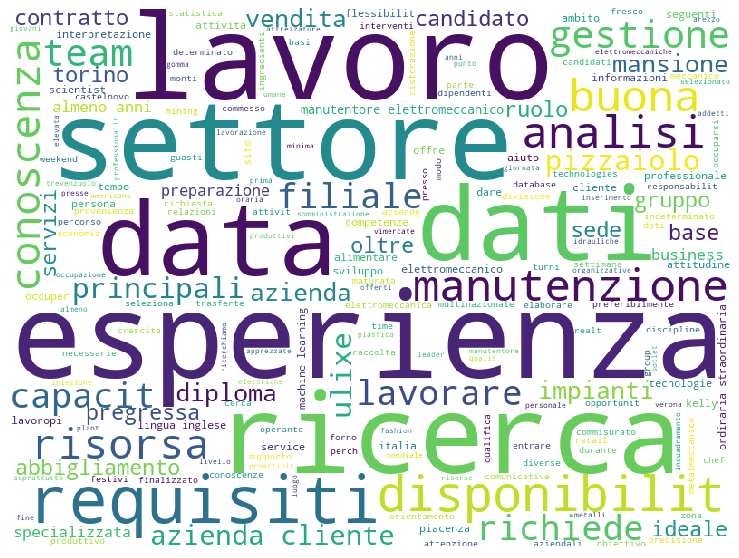

In [914]:
cloud(' '.join(job_description)) # most common words

#### Remove words referring to: Comuni, Provincie, Regioni

In [915]:
# load a text file containing a list of 'Comuni, Provincie, Regioni' italiane
geo_data = pd.read_fwf('listacomuni.txt')
geo_data.to_csv('listacomuni.csv')
geo_data = pd.read_csv('listacomuni.csv', sep=';')
geo_data.head()

,",Istat",Comune,Provincia,Regione,Prefisso,CAP,CodFisco,Abitanti,Link
0,"0,028001",Abano Terme,PD,VEN,49,35031,A001,19726,http://www.comuni-italiani.it/028/001/
1,"1,098001",Abbadia Cerreto,LO,LOM,371,26834,A004,293,http://www.comuni-italiani.it/098/001/
2,"2,097001",Abbadia Lariana,LC,LOM,341,23821,A005,3305,http://www.comuni-italiani.it/097/001/
3,"3,052001",Abbadia San Salvatore,SI,TOS,577,53021,A006,6722,http://www.comuni-italiani.it/052/001/
4,"4,095001",Abbasanta,OR,SAR,785,09071,A007,2872,http://www.comuni-italiani.it/095/001/


In [916]:
comune = [i.lower() for i in geo_data.Comune]
geo_data.Provincia = geo_data.Provincia.apply(lambda x: str(x))
provincia = [i.lower() for i in geo_data.Provincia]
regione = [i.lower() for i in geo_data.Regione]
print('Comuni samples:',comune[:10])
print(20*'%')
print('Provincia samples:',provincia[:10])
print(20*'%')
print('Regione samples:',regione[:10])

Comuni samples: ['abano terme', 'abbadia cerreto', 'abbadia lariana', 'abbadia san salvatore', 'abbasanta', 'abbateggio', 'abbiategrasso', 'abetone', 'abriola', 'acate']
%%%%%%%%%%%%%%%%%%%%
Provincia samples: ['pd', 'lo', 'lc', 'si', 'or', 'pe', 'mi', 'pt', 'pz', 'rg']
%%%%%%%%%%%%%%%%%%%%
Regione samples: ['ven', 'lom', 'lom', 'tos', 'sar', 'abr', 'lom', 'tos', 'bas', 'sic']


In [917]:
# example
print('verona' in comune)
print('trieste' in comune)
print('dublino' in comune)

True
True
False


##### Wrap previous commands into below function

In [918]:
def remove_comuni(data, column, geo_data):
    ''' function to remove geographic noisy'''
    comune = [i.lower() for i in geo_data.Comune]
    geo_data.Provincia = geo_data.Provincia.apply(lambda x: str(x))
    provincia = [i.lower() for i in geo_data.Provincia]
    regione = [i.lower() for i in geo_data.Regione]
    
    data[column] = data[column].apply(lambda x: [i for i in x if i not in comune])
    data[column] = data[column].apply(lambda x: [i for i in x if i not in provincia])
    data[column] = data[column].apply(lambda x: [i for i in x if i not in regione])
    
    return data

In [919]:
data = remove_comuni(data, 'Job_Description', geo_data)
data.head(5)

,Job_Description,Role,Target
0,"[seleziona, manutentore, inserimento, somminis...",Manutentore elettromeccanico,elettromeccanici
1,"[ricerchiamo, ricerca, addetti, vendita, punto...",commesso di vendita,commessi alle vendite al minuto
2,"[filiale, seleziona, azienda, cliente, settore...",Manutentore elettromeccanico,elettromeccanici
3,"[kelly, services, multinazionale, americana, l...",Manutentore elettromeccanico,elettromeccanici
4,"[adhr, filiale, ricerca, azienda, cliente, set...",Data Scientist,statistici


##### Get rid of unusual_words : misspelled words - uncommon words¶

In [920]:
# italian_vocab = pd.read_fwf('660000_parole_italiane.txt', names = ['word'])
# italian_vocab = set(italian_vocab.word.tolist())
# english_vocab = sorted(set(w.lower() for w in nltk.corpus.words.words())) # english vocabulary

In [921]:
# def uncommon_words(data,column, italian_vocab, english_vocab = None):
#     data[column] = data[column].apply(lambda x: [i for i in x if i in italian_vocab])
#     return data

In [922]:
# data = uncommon_words(data, 'Job_Description', italian_vocab, english_vocab)
# data # note that the word 'vimercate' is not present anymore 

                              Frequency
MANUTENTORE ELETTROMECCANICO           
manutenzione                          7
elettromeccanico                      7
esperienza                            7
settore                               6
manutentore                           5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     Frequency
COMMESSO DI VENDITA           
vendita                      4
abbigliamento                4
ricerca                      2
esperienza                   2
settore                      2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                 Frequency
DATA SCIENTIST            
data                    10
dati                    10
analisi                  6
principali               5
lavoro                   5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
           

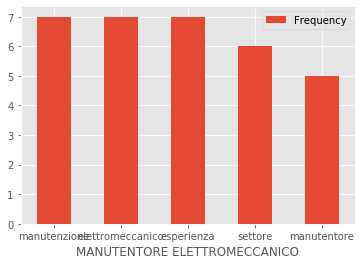

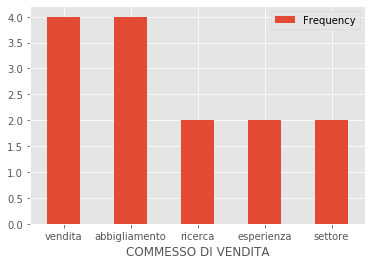

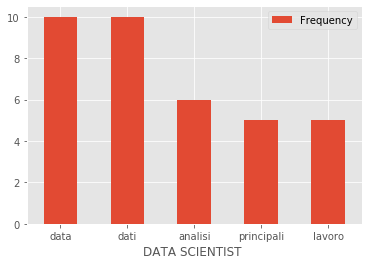

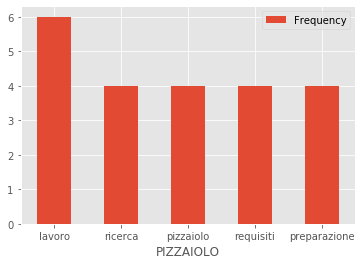

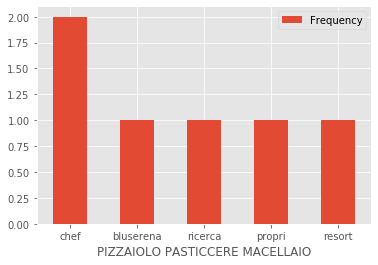

In [923]:
%matplotlib inline
matplotlib.style.use('ggplot')
field = "Job_Description"
Role = list(data.Role.unique())
for i in Role:
    txt = data[data['Role']==i][field]
    txt = [i for x in txt.tolist() for i in x]
    words_except_stop_dist = nltk.FreqDist(w for w in txt) 
    words_except_stop_dist
    rslt = pd.DataFrame(words_except_stop_dist.most_common(5),
                            columns=[i.upper(), 'Frequency']).set_index(i.upper())
    print(rslt)
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)
    print(100 *'%')

##### Create Role dictionary and encode the column Role

In [924]:
Role_dictionary = pd.Series(data['Target'].unique()).to_dict()
Role_dictionary = dict([(value, key) for key, value in Role_dictionary.items()])

In [925]:
Role_dictionary

{'elettromeccanici': 0,
 'commessi alle vendite al minuto': 1,
 'statistici': 2,
 'cuochi in alberghi e ristoranti': 3,
 'unknown': 4}

In [926]:
# save role dictionary as picke file
with open('Role_dictionary.pickle', 'wb') as handle:
    pickle.dump(Role_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('Role_dictionary.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [927]:
role_encoded = []
for i in data.Target:
    role_encoded.append(Role_dictionary.get(i, None))

In [928]:
print(role_encoded)
print(10 *'%')
print(data.Target.tolist())

[0, 1, 0, 0, 2, 2, 3, 4, 1, 1, 0, 2, 3, 3]
%%%%%%%%%%
['elettromeccanici', 'commessi alle vendite al minuto', 'elettromeccanici', 'elettromeccanici', 'statistici', 'statistici', 'cuochi in alberghi e ristoranti', 'unknown', 'commessi alle vendite al minuto', 'commessi alle vendite al minuto', 'elettromeccanici', 'statistici', 'cuochi in alberghi e ristoranti', 'cuochi in alberghi e ristoranti']


In [929]:
##### replace old role values with new values
data.Role = role_encoded

In [930]:
data.head()

,Job_Description,Role,Target
0,"[seleziona, manutentore, inserimento, somminis...",0,elettromeccanici
1,"[ricerchiamo, ricerca, addetti, vendita, punto...",1,commessi alle vendite al minuto
2,"[filiale, seleziona, azienda, cliente, settore...",0,elettromeccanici
3,"[kelly, services, multinazionale, americana, l...",0,elettromeccanici
4,"[adhr, filiale, ricerca, azienda, cliente, set...",2,statistici


In [931]:
## remove words like dell, della, dello, sull, degl. etc.
data.Job_Description = data.Job_Description.apply(lambda x: [i for i in x if not (i.startswith('dell') \
                                                                    or i.startswith('sull')\
                                                                     or i.startswith('degl')
                                                                     or i.startswith('dall')
                                                                     or i.startswith('all')
                                                                   or i.strip().startswith('kell'))])

In [933]:
data.Job_Description.iloc[3] # get rid of words starting with kell look at previous cell in row 3

['services',
 'multinazionale',
 'americana',
 'leader',
 'risorse',
 'umane',
 'oltre',
 'anni',
 'societ',
 'apprezzate',
 'livello',
 'mondiale',
 'elevata',
 'qualit',
 'servizi',
 'offerti',
 'professionalit',
 'personale',
 'selezionato',
 'offre',
 'candidati',
 'giovani',
 'cerca',
 'prima',
 'occupazione',
 'dirigenti',
 'stimolanti',
 'opportunit',
 'lavoro',
 'tempo',
 'determinato',
 'indeterminato',
 'oltre',
 'servizi',
 'orientamento',
 'formazione',
 'maggiori',
 'informazioni',
 'consulta',
 'sito',
 'filiale',
 'services',
 'ricerca',
 'azienda',
 'cliente',
 'operante',
 'metalmeccanico',
 'sede',
 'provincia',
 'tecnico',
 'elettromeccanico',
 'candidato',
 'ideale',
 'maturato',
 'almeno',
 'anni',
 'esperienza',
 'attivit',
 'service',
 'manutenzione',
 'elettromeccanica',
 'ruolo',
 'prevedr',
 'attivit',
 'manutenzione',
 'elettromeccanica',
 'ordinaria',
 'straordinaria',
 'ricerca',
 'guasti',
 'interventi',
 'sensori',
 'telecamere',
 'carrelli',
 'scorriment

#### have a look at bigrams

In [664]:
data.Job_Description

0     [seleziona, manutentore, inserimento, somminis...
1     [ricerchiamo, ricerca, addetti, vendita, punto...
2     [filiale, seleziona, azienda, cliente, settore...
3     [services, multinazionale, americana, leader, ...
4     [adhr, filiale, ricerca, azienda, cliente, set...
5     [cercando, data, scientist, esperto, appassion...
6     [infor, elea, ricerca, azienda, cliente, figur...
7     [bluserena, ricerca, propri, resort, abruzzo, ...
8     [esclusiva, boutique, multibrand, sita, isola,...
9     [cliente, castel, guelfo, ricerca, commesso, a...
10    [lavoropi, everywhere, divisione, lavoropi, sp...
11    [group, agenzia, lavoro, ricerca, azienda, cli...
12    [descrizione, azienda, synergie, italia, filia...
13    [lavoropi, filiale, crostolo, ricerca, aiuto, ...
Name: Job_Description, dtype: object

In [665]:
from nltk import bigrams, collocations
Text = data.Job_Description.iloc[1]
bigrams_from_text = bigrams(Text)
list(bigrams_from_text)[:6]

[('ricerchiamo', 'ricerca'),
 ('ricerca', 'addetti'),
 ('addetti', 'vendita'),
 ('vendita', 'punto'),
 ('punto', 'vendita'),
 ('vendita', 'abbigliamento')]

In [666]:
bigrams_from_text = bigrams(Text)
list(iter(dict(nltk.FreqDist(i for i in list(bigrams_from_text))).items()))[:6]

[(('ricerchiamo', 'ricerca'), 1),
 (('ricerca', 'addetti'), 1),
 (('addetti', 'vendita'), 1),
 (('vendita', 'punto'), 1),
 (('punto', 'vendita'), 1),
 (('vendita', 'abbigliamento'), 1)]

##### convert each word tokenized into a string of words

In [934]:
data.Job_Description = data.Job_Description.apply(lambda x: ' '.join(x))
data.Job_Description.head()

0    seleziona manutentore inserimento somministraz...
1    ricerchiamo ricerca addetti vendita punto vend...
2    filiale seleziona azienda cliente settore meta...
3    services multinazionale americana leader risor...
4    adhr filiale ricerca azienda cliente settore i...
Name: Job_Description, dtype: object

## Incorporate additional information from  info/professioni dataset

In [935]:
info_data = pd.read_csv('info_data.csv',names = ['Subgroup','Info'], skiprows=1)
info_data['Subgroup'] = info_data['Subgroup'] .apply(lambda x: x.lower())
info_data

,Subgroup,Info
0,statistici,"['controllando', 'progetti', 'realizzazione', ..."
1,cuochi in alberghi e ristoranti,"['preparato', 'rispettando', 'avendo', 'proced..."
2,commessi alle vendite al minuto,"['controllando', 'comunicare', 'richiesto', 'e..."
3,elettromeccanici,"['realizzazione', 'particolari', 'manutenzione..."


In [936]:
import ast
info_data['Info'] = info_data['Info'].apply(lambda x: ast.literal_eval(x))
info_data
# ast.literal_eval(info_data['info'].iloc[0])

,Subgroup,Info
0,statistici,"[controllando, progetti, realizzazione, assicu..."
1,cuochi in alberghi e ristoranti,"[preparato, rispettando, avendo, procedure, nu..."
2,commessi alle vendite al minuto,"[controllando, comunicare, richiesto, esercent..."
3,elettromeccanici,"[realizzazione, particolari, manutenzione, ese..."


In [937]:
' '.join(info_data['Info'].iloc[1])

'preparato rispettando avendo procedure nuove condimenti pulendo proposizioni evitare preliminare alimento farciture controllo elaborazione senso tempi conto flussi sicurezza pizze gestire semilavorati base conservazione dolciarie piano applicando impasto esporre garantire artistica risorse materiale forno composizione precedentemente piatti operativo estetiche gestione buffet agli legna focacce igienizzazione presidiando regole ricevute selezionando imprevisti servizio presentare corretta approvvigionamenti comporre luoghi cotto secchino tipo tempo elettrico autocontrollo ruoli attraverso disco larghezza sviluppo idonei condimento compiere rispetto assegnati prodotti provvedendo cura impasti metodi materie ristorazione coordinamento lavorando vista pani dimensioni decorazione utilizzando spessore decorativi fornitori effettuando stato prima esigenze effettuare igiene componenti vassoi alimentari offerti ordinativi diversi farcitura stessi attrezzature valorizzazione prime compiti nece

##### One Approach: take the most common words in 'Info' and use those to create one hot encoded vectors.

            Frequency
STATISTICI           
dati                3
sparql              2
xquery              2
mdx                 2
n1ql                2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                 Frequency
CUOCHI IN ALBERGHI E RISTORANTI           
preparato                                1
rispettando                              1
avendo                                   1
procedure                                1
nuove                                    1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                 Frequency
COMMESSI ALLE VENDITE AL MINUTO           
industria                                2
abbigliamento                            2
controllando                             1
comunicare                               1
richiesto                                1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

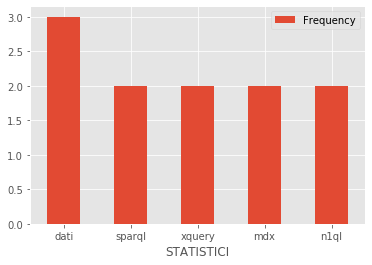

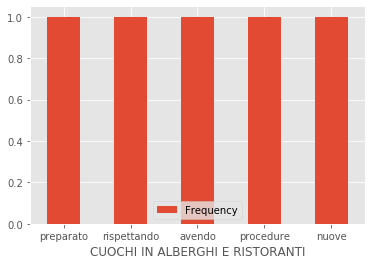

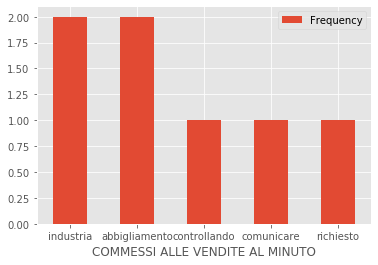

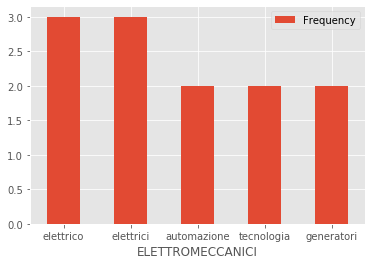

In [541]:
%matplotlib inline
matplotlib.style.use('ggplot')
field = "Info"
Role = list(info_data.Subgroup.unique())
info_data['Info'] = info_data['Info'].apply(lambda x: ' '.join(x))
info_data.Info = info_data.Info.apply(lambda x: word_tokenize(x))
for i in Role:
    txt = info_data[info_data['Subgroup']==i][field]
    txt = [i for x in txt.tolist() for i in x]
    words_except_stop_dist = nltk.FreqDist(w for w in txt) 
    words_except_stop_dist
    rslt = pd.DataFrame(words_except_stop_dist.most_common(5),
                            columns=[i.upper(), 'Frequency']).set_index(i.upper())
    print(rslt)
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)
    print(100 *'%')

## Stemming / Lemmatization
##### Stemming:
Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi

##### Lemmatization:
Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet".

We go for stemming

In [572]:
# # decide if to use this or not
# stemmer = nltk.stem.snowball.ItalianStemmer(ignore_stopwords=False)
# # example:
# print('ricercare -->',stemmer.stem('ricercare'))
# print('ricerca -->', stemmer.stem('ricerca'))
# data.Job_Description = data.Job_Description.apply(lambda x: list(set([stemmer.stem(i) for i in x])))
# data.Job_Description.head()

In [938]:
stemmer = nltk.stem.snowball.ItalianStemmer(ignore_stopwords=False)

In [939]:
data['Job_Description'] = data['Job_Description'].apply(lambda x: [stemmer.stem(i) for i in word_tokenize(x)])
data.head()

,Job_Description,Role,Target
0,"[selezion, manutentor, inser, somministr, pres...",0,elettromeccanici
1,"[ricerc, ricerc, addett, vend, punt, vend, abb...",1,commessi alle vendite al minuto
2,"[filial, selezion, azi, client, settor, metalm...",0,elettromeccanici
3,"[services, multinazional, american, leader, ri...",0,elettromeccanici
4,"[adhr, filial, ricerc, azi, client, settor, in...",2,statistici


In [940]:
info_data['Info'] = info_data['Info'].apply(lambda x: [stemmer.stem(i) for i in x])
info_data.head()

,Subgroup,Info
0,statistici,"[controll, progett, realizz, assicur, usufrutt..."
1,cuochi in alberghi e ristoranti,"[prepar, rispett, avend, procedur, nuov, cond,..."
2,commessi alle vendite al minuto,"[controll, comunic, richiest, esercent, isol, ..."
3,elettromeccanici,"[realizz, particolar, manutenzion, esegu, crit..."


#### Create one hot encoded columns for each word in info_data.Info

In [941]:
all_words = []
for i in info_data['Info']:
    all_words.append(i)
lista_info_words = list(set([i for x in all_words for i in x]))

In [942]:
for i in lista_info_words:
    data[i] = data['Job_Description'].apply(lambda x:  1 if i in x else 0)

In [944]:
print(data.shape)
data

(14, 434)


,Job_Description,Role,Target,past,solvibil,abbigl,lavor,elettron,artist,sottrazion,...,modal,identific,collaud,comunic,batter,riordin,illustr,predispon,ordin,esporr
0,"[selezion, manutentor, inser, somministr, pres...",0,elettromeccanici,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[ricerc, ricerc, addett, vend, punt, vend, abb...",1,commessi alle vendite al minuto,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[filial, selezion, azi, client, settor, metalm...",0,elettromeccanici,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[services, multinazional, american, leader, ri...",0,elettromeccanici,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[adhr, filial, ricerc, azi, client, settor, in...",2,statistici,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"[cerc, dat, scientist, espert, appassion, unis...",2,statistici,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"[infor, ele, ricerc, azi, client, figur, profe...",3,cuochi in alberghi e ristoranti,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"[bluseren, ricerc, propr, resort, abruzz, pugl...",4,unknown,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"[esclus, boutiqu, multibrand, sit, isol, panar...",1,commessi alle vendite al minuto,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"[client, castel, guelf, ricerc, commess, abbig...",1,commessi alle vendite al minuto,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Split 

In [945]:
data['Job_Description'] = data.Job_Description.apply(lambda x: ' '.join(x))
data['Job_Description'] 

0     selezion manutentor inser somministr press azi...
1     ricerc ricerc addett vend punt vend abbigl fas...
2     filial selezion azi client settor metalmeccan ...
3     services multinazional american leader risors ...
4     adhr filial ricerc azi client settor informat ...
5     cerc dat scientist espert appassion unisc team...
6     infor ele ricerc azi client figur professional...
7     bluseren ricerc propr resort abruzz pugl calab...
8     esclus boutiqu multibrand sit isol panare isol...
9     client castel guelf ricerc commess abbigl part...
10    lavorop everywh division lavorop specializz ri...
11    group agenz lavor ricerc azi client specializz...
12    descrizion azi synerg ital filial division spe...
13    lavorop filial crostol ricerc aiut pizzaiol ca...
Name: Job_Description, dtype: object

In [966]:
X = data.copy()
X.drop(['Role', 'Target'], axis = 1, inplace = True)
y = data['Role']
X.head()

,Job_Description,past,solvibil,abbigl,lavor,elettron,artist,sottrazion,legn,scaffal,...,modal,identific,collaud,comunic,batter,riordin,illustr,predispon,ordin,esporr
0,selezion manutentor inser somministr press azi...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ricerc ricerc addett vend punt vend abbigl fas...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filial selezion azi client settor metalmeccan ...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,services multinazional american leader risors ...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adhr filial ricerc azi client settor informat ...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [967]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y)
#data.iloc[:,3:]
print('Number of rows in the total set: {}'.format(data.shape))
print('Number of rows in the training set: {}'.format(X_train.shape))
print('Number of rows in the test set: {}'.format(X_test.shape))

Number of rows in the total set: (14, 434)
Number of rows in the training set: (10, 432)
Number of rows in the test set: (4, 432)


### Bag of Words processing to our dataset

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))

##### max_df:
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.

##### max_features:
determines the number of columns in the matrix.

##### n-gram
range: we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [1003]:
count_vector = CountVectorizer(max_df = 0.8, ngram_range=(1,3))

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train['Job_Description']).toarray()

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test['Job_Description']).toarray()

training_data.shape

(10, 1670)

In [1015]:
s = X_train.iloc[:,1:].to_numpy()
s.shape

(10, 431)

In [1023]:
training_data = numpy.concatenate((training_data, X_train.iloc[:,1:].to_numpy()), axis = 1)
testing_data = numpy.concatenate((testing_data, X_test.iloc[:,1:].to_numpy()), axis = 1)

In [1025]:
list(count_vector.vocabulary_.keys())[:10] #1-gram

['lavorop',
 'everywh',
 'division',
 'specializz',
 'ricerc',
 'selezion',
 'profil',
 'internazional',
 'sit',
 'produtt']

In [1026]:
list(count_vector.vocabulary_.keys())[-10:] # need to remove oppure and other not meaningfull words 3-grams

['tip contratt commisur',
 'contratt commisur bas',
 'commisur bas esperit',
 'bas esperit matur',
 'esperit matur lavor',
 'matur lavor sed',
 'lavor sed lavor',
 'sed lavor settor',
 'lavor settor provenit',
 'settor provenit ristor']

In [1027]:
print('training data',training_data.shape)
print('testing data',testing_data.shape)

training data (10, 2532)
testing data (4, 2532)


### Naive Bayes implementation

In [1028]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1029]:
def get_key(value, dictionary):
    for k,v in dictionary.items():
        if value == v:
            return k

In [1030]:
predictions = naive_bayes.predict(testing_data)
print(predictions)
predictions_keys = []
for i in predictions:
    predictions_keys.append(get_key(i,Role_dictionary))
print('Prediction for rows {} are \n {}'.format(X_test.index.tolist(),predictions_keys))

print(100*'%')
actual_predictions = []
for i in y_test.tolist():
    actual_predictions.append(get_key(i,Role_dictionary))
print('actual predictions are: \n {}'.format(actual_predictions))

[2 1 0 0]
Prediction for rows [4, 9, 2, 0] are 
 ['statistici', 'commessi alle vendite al minuto', 'elettromeccanici', 'elettromeccanici']
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
actual predictions are: 
 ['statistici', 'commessi alle vendite al minuto', 'elettromeccanici', 'elettromeccanici']


In [1031]:
# check the accuracy of our model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))

Accuracy score:  1.0
